In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize
import os

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [ ]:
path = "MICC-F2000"
imgs =[]
labels =[]
for file in os.listdir(path):
    if '.jpg' not in file:
        continue
    img = plt.imread(os.path.join(path,file))
    img = imresize(img,(50,50))
    img = rgb2gray(img)
    imgs.append(img)
    if 'tamp' in file:
        labels.append(1)
    else:
        labels.append(0)
        
imgs = np.array(imgs)
labels = np.array(labels)

In [ ]:
from six.moves import cPickle
f = open('MICC-F2000_imgs.save', 'wb')
cPickle.dump(imgs, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [ ]:
f = open('MICC-F2000_labels.save', 'wb')
cPickle.dump(labels, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [11]:
path = "MICC-F220"
imgs1 =[]
labels1 =[]
for file in os.listdir(path):
    if '.jpg' not in file:
        continue
    img = plt.imread(os.path.join(path,file))
    img = imresize(img,(50,50))
    img = rgb2gray(img)
    imgs1.append(img)
    if 'tamp' in file:
        labels1.append(1)
    else:
        labels1.append(0)

imgs1 = np.array(imgs1)
labels1 = np.array(labels1)
print(imgs1.shape)
print(labels1.shape)

(220, 50, 50)
(220,)


In [16]:
f = open('MICC-F220_imgs.save', 'wb')
cPickle.dump(imgs1, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [17]:
f = open('MICC-F220_labels.save', 'wb')
cPickle.dump(labels1, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [14]:
img = plt.imread('1.png')
plt.imshow(img)
print(img.shape)

(2448, 3264, 3)


In [19]:
path = "MICC_F600"
imgs2 =[]
labels2 =[]
for file in os.listdir(path):
    if '.txt' in file or 'gt' in file:
        continue
    img = plt.imread(os.path.join(path,file))
    img = imresize(img,(50,50))
    img = rgb2gray(img)
    imgs2.append(img)
    if '.jpg' in file:
        labels2.append(0)
    else:
        labels2.append(1)

imgs2 = np.array(imgs2)
labels2 = np.array(labels2)
print(imgs2.shape)
print(labels2.shape)

(600, 50, 50)
(600,)


In [20]:
f = open('MICC_F600_imgs.save', 'wb')
cPickle.dump(imgs2, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [21]:
f = open('MICC_F600_labels.save', 'wb')
cPickle.dump(labels2, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [26]:
total_images = np.concatenate((imgs,imgs1,imgs2),axis=0)
print(total_images.shape)

(2820, 50, 50)


In [27]:
total_labels = np.concatenate((labels,labels1,labels2) , axis=0)
print(total_labels.shape)

(2820,)


In [28]:
f = open('imgs.save', 'wb')
cPickle.dump(total_images, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [29]:
f = open('labels.save', 'wb')
cPickle.dump(total_labels, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [9]:
from six.moves import cPickle
f = open('imgs.save', 'rb')
total_images = cPickle.load(f)
f.close()

In [13]:
f = open('labels.save', 'rb')
labels = cPickle.load(f)
f.close()

In [10]:
temp=[]
for i in total_images:
    temp.append(i.flatten())

imgs = np.array(temp)
print(imgs.shape)

(2820, 2500)


In [11]:
from sklearn.cross_validation import train_test_split

C:\Users\new\Anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
images_train , images_test , labels_train , labels_test = train_test_split(imgs,labels,test_size = 0.1, random_state=10)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adagrad
from keras.layers.normalization import BatchNormalization
import tensorflow as tf

In [16]:
images_train = images_train.reshape(images_train.shape[0], 50, 50, 1)
images_test = images_test.reshape(images_test.shape[0], 50, 50 ,1)

In [17]:
images_train = images_train.astype('float32')
images_test = images_test.astype('float32')
labels_train = labels_train.astype('float32')
labels_test = labels_test.astype('float32')


In [37]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, init = 'uniform', input_shape=(50,50,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 

model.add(Flatten())

model.add(Dense(32, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(16, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(8, init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(1, activation='sigmoid'))


learning_rate=0.001
# Compile model
momentum = 0.8
epochs = 50
#keras.optimizers
decay_rate = learning_rate / epochs
sgd = Adagrad(lr=learning_rate,  decay=decay_rate)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])




In [38]:
model.fit(images_train,labels_train, nb_epoch=epochs, verbose=2 , validation_split=0.1)

Train on 2284 samples, validate on 254 samples
Epoch 1/50
92s - loss: 0.1989 - acc: 0.7045 - val_loss: 0.2449 - val_acc: 0.6654
Epoch 2/50
100s - loss: 0.1484 - acc: 0.8100 - val_loss: 0.2371 - val_acc: 0.7638
Epoch 3/50
108s - loss: 0.1242 - acc: 0.8485 - val_loss: 0.2252 - val_acc: 0.8858
Epoch 4/50
105s - loss: 0.1128 - acc: 0.8599 - val_loss: 0.2018 - val_acc: 0.9016
Epoch 5/50
103s - loss: 0.0972 - acc: 0.8962 - val_loss: 0.1685 - val_acc: 0.9055
Epoch 6/50
110s - loss: 0.0911 - acc: 0.9089 - val_loss: 0.1324 - val_acc: 0.9213
Epoch 7/50
112s - loss: 0.0855 - acc: 0.9129 - val_loss: 0.0999 - val_acc: 0.9291
Epoch 8/50
117s - loss: 0.0802 - acc: 0.9282 - val_loss: 0.0859 - val_acc: 0.9291
Epoch 9/50
114s - loss: 0.0767 - acc: 0.9247 - val_loss: 0.0752 - val_acc: 0.9409
Epoch 10/50
116s - loss: 0.0715 - acc: 0.9378 - val_loss: 0.0697 - val_acc: 0.9409
Epoch 11/50
121s - loss: 0.0728 - acc: 0.9335 - val_loss: 0.0655 - val_acc: 0.9409
Epoch 12/50
119s - loss: 0.0680 - acc: 0.9405 - va

In [39]:
scores = model.evaluate(images_test, labels_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

282/282 [==============================] - 11s    

acc: 95.74%


In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("final_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("final_model.h5")
print("Saved model to disk")

Saved model to disk


In [34]:
from keras.models import model_from_json
# load json and create model
json_file = open('final_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("final_model.h5")
print("Loaded model from disk")

#compiling model
learning_rate=0.001
# Compile model
momentum = 0.8
epochs = 50
#keras.optimizers
decay_rate = learning_rate / epochs
sgd = Adagrad(lr=learning_rate,  decay=decay_rate)
loaded_model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy','precision','recall','fbeta_score'])
print("Model compiled")

Loaded model from disk
Model compiled


In [31]:
scores = loaded_model.evaluate(images_test, labels_test)
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (loaded_model.metrics_names[2], scores[2]*100))
print("\n%s: %.2f%%" % (loaded_model.metrics_names[3], scores[3]*100))
print("\n%s: %.2f%%" % (loaded_model.metrics_names[4], scores[4]*100))

282/282 [==============================] - 3s     

acc: 95.74%

precision: 90.35%

recall: 98.16%

fbeta_score: 93.79%


In [35]:
from sklearn.metrics import roc_curve, auc

In [44]:
def generate_results(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, 'r',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()

Generating results


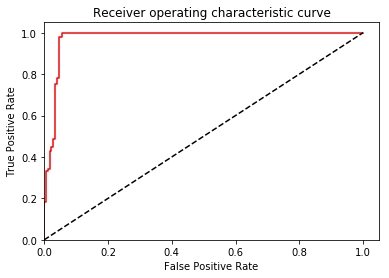

In [45]:
labels_pred = loaded_model.predict(images_test)

print('Generating results')
generate_results(labels_test, labels_pred[:, 0])